---

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#
# Colors updated to match updated SPM colors
color_ssp119 = np.array([0, 173,207])/255
color_ssp126 = np.array([23  ,60 ,  102])/255
color_ssp245 = np.array([247 ,148,  32])/255
color_ssp370 = np.array([231 ,29 ,  37])/255
color_ssp585 = np.array([149 ,27 ,  30])/255
# ====================================================================================
#
ssp = ['ssp126', 'ssp245', 'ssp370', 'ssp585']
file_paths = [f'/projects/kopp/pk695/NZ_ReRun/FACTS_NZ_ggg/medium_confidence/{ssp_value}/total_{ssp_value}_medium_confidence_values.nc' for ssp_value in ssp]
# file_paths = [f'/projects/kopp/pk695/NZ_ReRun/FACTS_1.0_NZ_pk_updatedVLM/medium_confidence/{ssp_value}/total_{ssp_value}_medium_confidence_values.nc' for ssp_value in ssp]
# file_paths = [f'/projects/kopp/pk695/NZ_ReRun/FACTS_1.0_NZ_pk/medium_confidence/{ssp_value}/total_{ssp_value}_medium_confidence_values.nc' for ssp_value in ssp]
# file_paths = [f'/scratch/pk695/FACTS/nzOG-pk695/local-pk695/006_confidence_output_files/medium_confidence/{ssp_value}/total_{ssp_value}_medium_confidence_values.nc' for ssp_value in ssp]
# file_paths = [f'/projects/kopp/ggg46/nz_projections/regional/confidence_output_files/medium_confidence/{ssp_value}/total_{ssp_value}_medium_confidence_values.nc' for ssp_value in ssp]
#
station=1233
#
# Create the figure and axes
fig, ax = plt.subplots()
#
lines = []
labels = []
#
# Print the generated file paths
for fp0,fp1 in enumerate(file_paths):
    #
    d0=xr.open_dataset(file_paths[fp0])
    #
    percentile=d0['quantiles'].values*100
    idx = np.where(percentile == 50)[0]; 
    idx1 = np.where(percentile == 17)[0]
    idx2 = np.where(percentile == 83)[0]
    #
    slc=d0['sea_level_change'].values/1000
    time=d0['years'].values
    #
    line, = plt.plot(time, slc[idx, :, station].reshape(-1), color=eval(f'color_{ssp[fp0]}'))
    lines.append(line)
    labels.append(f'{ssp[fp0]} M')
    #
    plt.fill_between(time, slc[idx1, :, station].reshape(-1), slc[idx2, :, station].reshape(-1),
                     color=eval(f'color_{ssp[fp0]}'), alpha=0.2)
    
    # Add annotations for real values
    if f'{ssp[fp0]}' == 'ssp585': 
        ax.text(1.01, slc[idx2, -1, station][0] + 0.03, f'{slc[idx2, -1, station][0]:.2f} m', transform=ax.get_yaxis_transform(), ha='left', va='center', color=eval(f'color_{ssp[-1]}'))
    if f'{ssp[fp0]}' == 'ssp126': 
        ax.text(1.01, slc[idx1, -1, station][0] - 0.03, f'{slc[idx1, -1, station][0]:.2f} m', transform=ax.get_yaxis_transform(), ha='left', va='center', color=eval(f'color_{ssp[0]}'))
    
    
    #
# Set x-axis label and limits
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (m)')
plt.xlim(2020, 2150)
plt.ylim(-0.3, 2.7)
# Set x-axis tick labels every 10th value
plt.xticks(np.arange(2020, 2151, 10))
plt.yticks(np.arange(-0.3, 2.8, 0.3))

# Create the legend
plt.legend(lines, labels, loc='upper left')
#
# Adjust the width of the plot
fig.set_size_inches(10, 5)
# Set gridlines
plt.grid(True)
plt.show()


---

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()
#
# Plotting CODE 
#
# Adjust the width of the plot
fig.set_size_inches(10, 5)

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#
station=1233
#
# Colors updated to match updated SPM colors
colors = {
    'ssp119': np.array([0, 173, 207]) / 255,
    'ssp126': np.array([23, 60, 102]) / 255,
    'ssp245': np.array([247, 148, 32]) / 255,
    'ssp370': np.array([231, 29, 37]) / 255,
    'ssp585': np.array([149, 27, 30]) / 255
}
#
# SSP scenarios
ssp = ['ssp126', 'ssp245', 'ssp370', 'ssp585']
#
# Axis Properties
ylab='Sea Level Rise (m)'
x_min, x_max = 2020, 2150;                      y_min, y_max = -0.3, 2.7
x_ticks = np.arange(x_min, x_max + 1, 10);      y_ticks = np.arange(y_min, y_max + 0.1, 0.3)
#

In [ ]:
def plot(file_paths,station,ylab,x_min, x_max, y_min, y_max, x_ticks, y_ticks):
    lines = []
    labels = []
    for f_p, ssp_value in zip(file_paths, ssp):
        d0          = xr.open_dataset(f_p)
        percentile  = d0['quantiles'].values * 100
        idx         = np.where(percentile == 50)[0]
        idx1        = np.where(percentile == 17)[0]
        idx2        = np.where(percentile == 83)[0] 
        slc         = d0['sea_level_change'].values / 1000
        time        = d0['years'].values
        #
        line,       = plt.plot(time, slc[idx, :, station].reshape(-1), color=colors[ssp_value])
        lines.append(line); labels.append(f'{ssp_value} M')
        plt.fill_between(time, slc[idx1, :, station].reshape(-1), slc[idx2, :, station].reshape(-1),
                         color=colors[ssp_value], alpha=0.2)
        if ssp_value == 'ssp585':
            ax.text(1.01, slc[idx2, -1, station][0] + 0.03, f'{slc[idx2, -1, station][0]:.2f} m',
                    transform=ax.get_yaxis_transform(), ha='left', va='center', color=colors[ssp[-1]])
        if ssp_value == 'ssp126':
            ax.text(1.01, slc[idx1, -1, station][0] - 0.03, f'{slc[idx1, -1, station][0]:.2f} m',
                    transform=ax.get_yaxis_transform(), ha='left', va='center', color=colors[ssp[0]])
        #
    # Set x-axis label and limits
    plt.xlabel('Year')
    plt.ylabel(ylab)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    
    # Create the legend
    plt.legend(lines, labels, loc='upper left')
    plt.grid(True)
    plt.show()

---
#test

In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#
station=1233
#
# Colors updated to match updated SPM colors
colors = {
    'ssp119': np.array([0, 173, 207]) / 255,
    'ssp126': np.array([23, 60, 102]) / 255,
    'ssp245': np.array([247, 148, 32]) / 255,
    'ssp370': np.array([231, 29, 37]) / 255,
    'ssp585': np.array([149, 27, 30]) / 255
}
#
# SSP scenarios
ssp = ['ssp126', 'ssp245', 'ssp370', 'ssp585']
#
# Axis Properties
ylab='Sea Level Rise (m)'
x_min, x_max = 2020, 2150;                      y_min, y_max = -0.3, 2.7
x_ticks = np.arange(x_min, x_max + 1, 10);      y_ticks = np.arange(y_min, y_max + 0.1, 0.3)
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def plot(ax,file_paths,station,ylab,x_min, x_max, y_min, y_max, x_ticks, y_ticks):
    lines = []
    labels = []
    for i, (f_p, ssp_value) in enumerate(zip(file_paths, ssp)):
        d0          = xr.open_dataset(f_p, engine='netcdf4')
        percentile  = d0['quantiles'].values * 100
        idx         = np.where(percentile == 50)[0]
        idx1        = np.where(percentile == 17)[0]
        idx2        = np.where(percentile == 83)[0] 
        slc         = d0['sea_level_change'].values / 1000
        time        = d0['years'].values
        #
        line,       = ax.plot(time, slc[idx, :, station].reshape(-1), color=colors[ssp_value])
        lines.append(line); labels.append(f'{ssp_value} M')
        ax.fill_between(time, slc[idx1, :, station].reshape(-1), slc[idx2, :, station].reshape(-1),
                         color=colors[ssp_value], alpha=0.2)
        if ssp_value == 'ssp585':
            ax.text(1.01, slc[idx2, -1, station][0] + 0.03, f'{slc[idx2, -1, station][0]:.2f} m',
                    transform=ax.get_yaxis_transform(), ha='left', va='center', color=colors[ssp[-1]])
        if ssp_value == 'ssp126':
            ax.text(1.01, slc[idx1, -1, station][0] - 0.03, f'{slc[idx1, -1, station][0]:.2f} m',
                    transform=ax.get_yaxis_transform(), ha='left', va='center', color=colors[ssp[0]])
        #
        # Set x-axis label and limits
        ax.set_xlabel('Year')
        ax.set_ylabel(ylab)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticks, fontsize=8, rotation=45)
        ax.set_yticks(y_ticks)
        ax.grid(True)
        # if np.all(ax == axes[0]):
        #     ax.legend(lines, labels, loc='upper left')
        if np.all(ax == axes[0]):
            ax.legend(lines + [ax.fill_between([], [], [], color='gray', alpha=0.2)],
                      labels + ['Shading is 17-83 percentile'], loc='upper left', fontsize=7)
    #
    # plt.show()

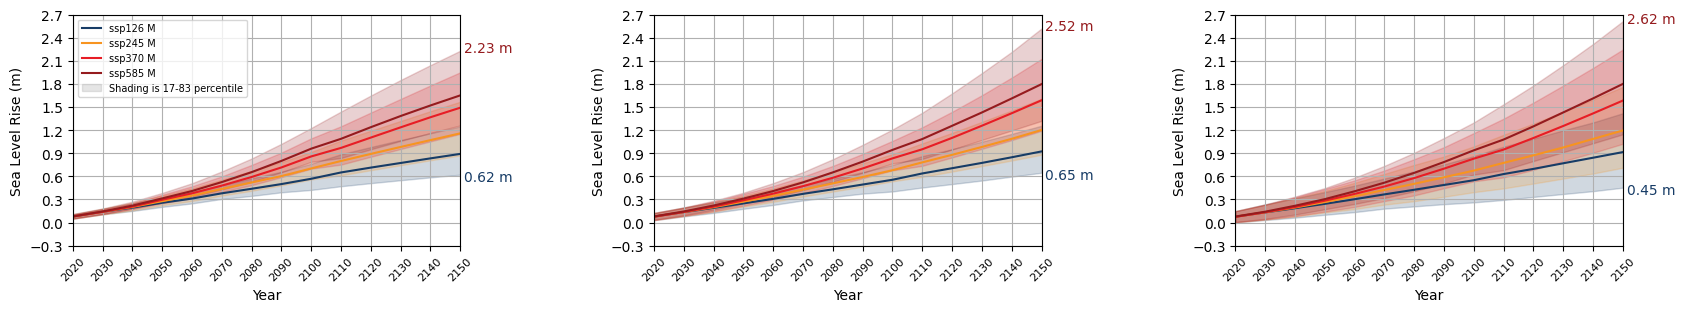

In [14]:
file_path1=[f'/projects/kopp/pk695/NZ_ReRun/FACTS_NZ_ggg/medium_confidence/{ssp_value}/total_{ssp_value}_medium_confidence_values.nc' for ssp_value in ssp]
file_path2=[f'/projects/kopp/pk695/NZ_ReRun/FACTS_1.0_NZ_pk_updatedVLM/medium_confidence/{ssp_value}/total_{ssp_value}_medium_confidence_values.nc' for ssp_value in ssp]
file_path3=[f'/projects/kopp/pk695/NZ_ReRun/FACTS_1.0_NZ_pk/medium_confidence/{ssp_value}/total_{ssp_value}_medium_confidence_values.nc' for ssp_value in ssp]
#
# fig, axes = plt.subplots(1, 3, figsize=(17, 3)); plt.subplots_adjust(wspace=0.3, hspace=0.2)
fig, axes = plt.subplots(1, 3, figsize=(20, 3)); plt.subplots_adjust(wspace=0.5, hspace=0.2)
# file_paths = [file_path1,]
plot(axes[0],file_path1,station,ylab,x_min, x_max, y_min, y_max, x_ticks, y_ticks)
plot(axes[1],file_path3,station,ylab,x_min, x_max, y_min, y_max, x_ticks, y_ticks)
plot(axes[2],file_path2,station,ylab,x_min, x_max, y_min, y_max, x_ticks, y_ticks)